In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()
X_full = housing.data
y_full = housing.target
feature_names = housing.feature_names

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_full, test_size=0.2, random_state=42
    )

In [5]:
X = X_train.tolist()
y = y_train.tolist()

In [6]:
#num_samples = 200
X = X[:]
y = y[:]

In [7]:
print(X[0],y[0])

[-0.3216542903733277, 0.34647802955744084, -0.16625886034634157, -0.19045098681609532, 0.7722505017447289, 0.0598084660592724, -1.3679762815342846, 1.2676445067754007] 1.03


In [8]:
from paraeant import EANT

In [9]:
population_size= 10
eant = EANT(population_size=population_size, 
            input_count=len(X[0]),  # 8 features
            output_count=1)  # Single output (housing price)

In [10]:
eant.initialize_minimal_population()

Generated 10 minimal networks


In [11]:
eant.evolve(X,y,generations=10)

Generated 10 minimal networks

==================== Generation 1/10 ====================
Evaluating population...
Best fitness so far: -5.513027

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 10 genomes

==================== Generation 2/10 ====================
Evaluating population...
Best fitness so far: -5.425142

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 10 genomes

==================== Generation 3/10 ====================
Evaluating population...
Best fitness so far: -5.312246

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different stru

In [12]:
print(eant.best_genome)

V0(arity=4, act=tanh, w=0.94) I(label=i7, w=0.03) I(label=i3, w=-6.19) I(label=i0, w=1.05) I(label=i5, w=-0.57)


In [17]:
eant=EANT(20,len(X[0]),1)
eant.evolve(X,y,30)

Generated 20 minimal networks

==================== Generation 1/30 ====================
Evaluating population...
Best fitness so far: -4.432422

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 20 genomes

==================== Generation 2/30 ====================
Evaluating population...
Best fitness so far: -3.328230

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 20 genomes

==================== Generation 3/30 ====================
Evaluating population...
Best fitness so far: -3.274125

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different stru

In [14]:
print(eant.best_genome)

V0(arity=7, act=leaky_relu, w=1.07) V3(arity=2, act=sigmoid, w=0.35) I(label=i7, w=0.38) I(label=i4, w=1.01) V2(arity=2, act=sigmoid, w=0.93) I(label=i4, w=1.56) I(label=i6, w=-0.54) V1(arity=3, act=leaky_relu, w=-0.46) JF(src=2, w=-0.12) I(label=i5, w=2.74) I(label=i4, w=0.73) I(label=i5, w=-1.53) I(label=i1, w=1.09) I(label=i0, w=1.16) I(label=i3, w=-3.06)


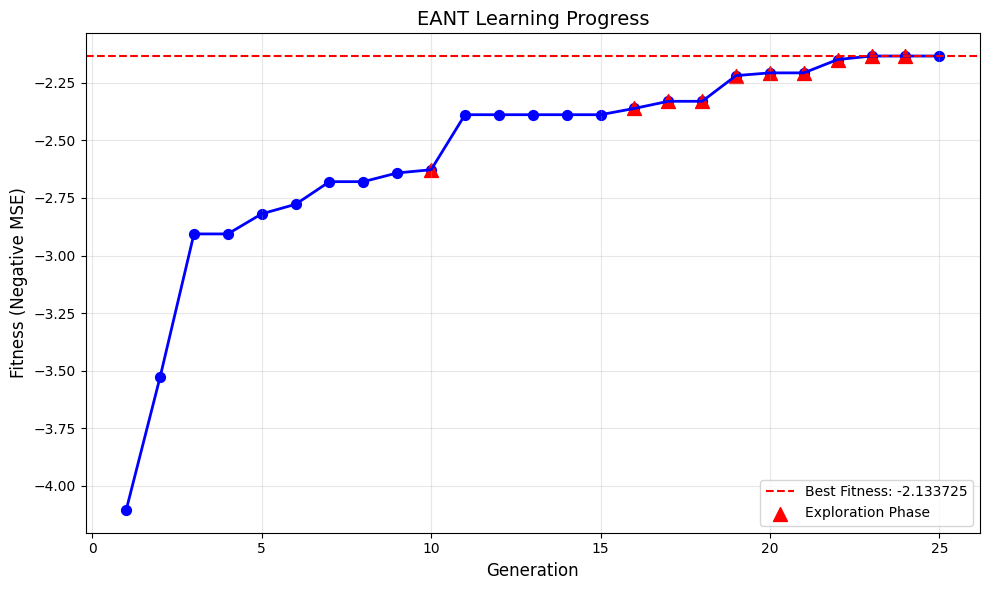

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Extract fitness history data
fitness_history = eant.fitness_history
generations = list(range(1, len(fitness_history) + 1))

# Create the main plot
plt.plot(generations, fitness_history, 'b-', linewidth=2)
plt.scatter(generations, fitness_history, color='blue', s=50)

# Add a horizontal line showing the overall best fitness
best_fitness = eant.best_fitness
plt.axhline(y=best_fitness, color='r', linestyle='--', 
            label=f'Best Fitness: {best_fitness:.6f}')

# Add labels and title
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Fitness (Negative MSE)', fontsize=12)
plt.title('EANT Learning Progress', fontsize=14)
plt.grid(True, alpha=0.3)

# Add exploration/exploitation indicators if available
if len(fitness_history) > eant.buffer_length:
    exploration_gens = []
    for i in range(eant.buffer_length, len(fitness_history)-1):
        current = fitness_history[i]
        previous = fitness_history[i-eant.buffer_length]
        if current - previous < eant.improvement_threshold:
            exploration_gens.append(i+1)  # +1 because generations are 1-indexed
    
    if exploration_gens:
        plt.scatter(exploration_gens, [fitness_history[i-1] for i in exploration_gens], 
                    color='red', s=100, marker='^', label='Exploration Phase')

    # Add legend and show plot
    plt.legend(fontsize=10)
    plt.tight_layout()


Testing the best genome on test data...
Best genome: V0(arity=7, act=leaky_relu, w=1.07) V3(arity=2, act=sigmoid, w=0.35) I(label=i7, w=0.38) I(label=i4, w=1.01) V2(arity=2, act=sigmoid, w=0.93) I(label=i4, w=1.56) I(label=i6, w=-0.54) V1(arity=3, act=leaky_relu, w=-0.46) JF(src=2, w=-0.12) I(label=i5, w=2.74) I(label=i4, w=0.73) I(label=i5, w=-1.53) I(label=i1, w=1.09) I(label=i0, w=1.16) I(label=i3, w=-3.06)
Test Results:
Mean Squared Error (MSE): 2.092091
R-squared (R²): -0.596518

Sample Predictions vs Actual Values:
Example 1: Actual = 0.4770, Predicted = -0.0080, Error = 0.4850
Example 2: Actual = 0.4580, Predicted = -0.0058, Error = 0.4638
Example 3: Actual = 5.0000, Predicted = 2.0225, Error = 2.9775
Example 4: Actual = 2.1860, Predicted = 1.4201, Error = 0.7659
Example 5: Actual = 2.7800, Predicted = 1.4112, Error = 1.3688


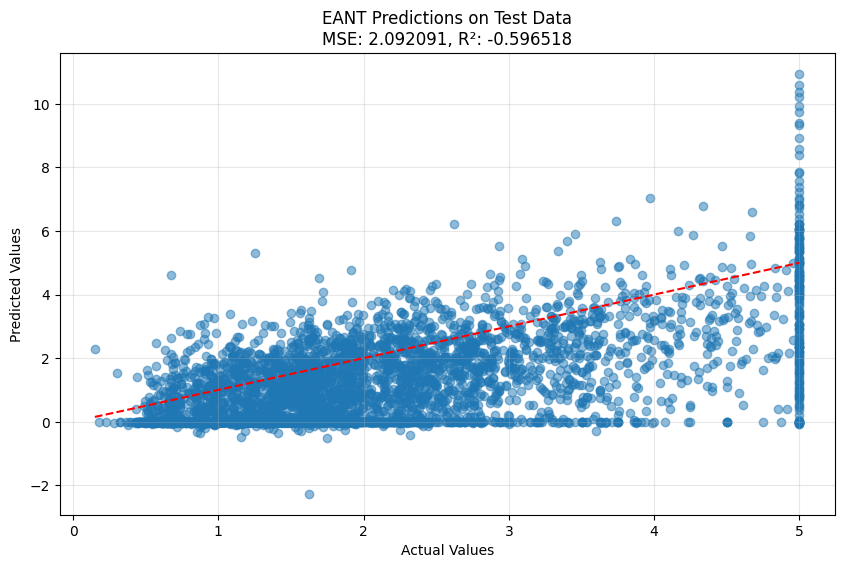


Error Statistics:
Average Absolute Error: 1.156658
Maximum Error: 5.950431
Minimum Error: 0.000578


In [16]:
import numpy as np
X_test_list = X_test.tolist() if isinstance(X_test, np.ndarray) else X_test
y_test_list = y_test.tolist() if isinstance(y_test, np.ndarray) else y_test

# Get the best genome and tree boundaries from the trained model
best_genome = eant.best_genome
best_tree_boundaries = eant.best_tree_boundaries

print("Testing the best genome on test data...")
print(f"Best genome: {best_genome}")

# Create an evaluator with the best genome
from neural_network_evaluator import NeuralNetworkEvaluator
evaluator = NeuralNetworkEvaluator(best_genome, best_tree_boundaries)

# Make predictions on test data
test_predictions = []
for x in X_test_list:
    # Create input dictionary for each test example
    inputs = {}
    for i, val in enumerate(x):
        inputs[f"i{i}"] = val
    
    # Evaluate the network
    outputs = evaluator.evaluate(inputs)
    test_predictions.append(outputs[0])
    
    # Reset state for next example
    evaluator.reset_state()

# Calculate error metrics
from sklearn.metrics import mean_squared_error, r2_score
test_mse = mean_squared_error(y_test_list, test_predictions)
test_r2 = r2_score(y_test_list, test_predictions)

print(f"Test Results:")
print(f"Mean Squared Error (MSE): {test_mse:.6f}")
print(f"R-squared (R²): {test_r2:.6f}")

# Look at some sample predictions
print("\nSample Predictions vs Actual Values:")
for i in range(min(5, len(test_predictions))):
    print(f"Example {i+1}: Actual = {y_test_list[i]:.4f}, Predicted = {test_predictions[i]:.4f}, Error = {abs(y_test_list[i] - test_predictions[i]):.4f}")

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test_list, test_predictions, alpha=0.5)
plt.plot([min(y_test_list), max(y_test_list)], [min(y_test_list), max(y_test_list)], 'r--')
plt.title(f'EANT Predictions on Test Data\nMSE: {test_mse:.6f}, R²: {test_r2:.6f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True, alpha=0.3)
plt.savefig('eant_test_results.png')
plt.show()

# Calculate a few more statistics
errors = [abs(a - p) for a, p in zip(y_test_list, test_predictions)]
average_error = sum(errors) / len(errors)
max_error = max(errors)
min_error = min(errors)

print(f"\nError Statistics:")
print(f"Average Absolute Error: {average_error:.6f}")
print(f"Maximum Error: {max_error:.6f}")
print(f"Minimum Error: {min_error:.6f}")

Generated 10 minimal networks

==================== Generation 1/30 ====================
Evaluating population...
Best fitness so far: -3.904376

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 10 genomes

==================== Generation 2/30 ====================
Evaluating population...
Best fitness so far: -2.741904

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 10 genomes

==================== Generation 3/30 ====================
Evaluating population...
Best fitness so far: -1.863013

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different stru

c:\Users\ailur\OneDrive\Desktop\EANT1\activation_util.py:13: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 20 genomes

==================== Generation 10/30 ====================
Evaluating population...
Best fitness so far: -0.917258
Improvement (0.051828) below threshold (0.2). Switching to exploration.

Structural Exploration: Creating new individuals through structural mutation
Added connection to vertex 0
New structure discovered! Protected for 3 generations: V1I5JF0JR0
Added sub-network to vertex 0
New structure discovered! Protected for 3 generations: V2I7JF0JR0
Removed connection from vertex 0
New structure discovered! Protected for 3 generations: V1I3JF0JR0
Added connection to vertex 0
New structure discovered! Protected for 3 generations: V1I5JF0JR0
Removed connection from vertex 0
New structure discovered! Protected for 3 generations: V1I3JF0JR0
Removed connection from vertex 0
New structure discovered! Protected for 3 ge

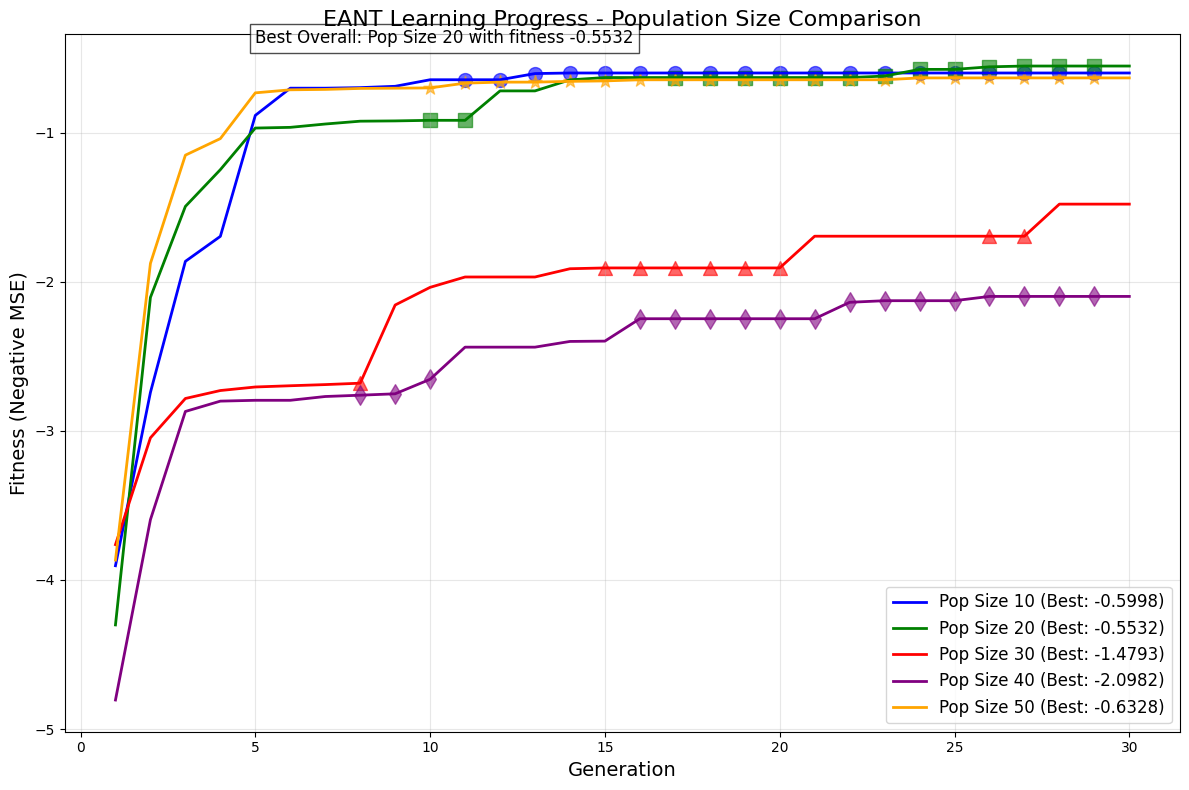

   population_size  best_fitness
1               20     -0.553165
0               10     -0.599829
4               50     -0.632777
2               30     -1.479263
3               40     -2.098200


In [ ]:
# self.mutation_prob = 0.6
# self.structural_mutation_prob = 0.6
# self.structural_mutation_prob_start = 0.2

# self.buffer_length = 5        # How many generations to look back
# self.improvement_threshold = 0.2  # Minimum improvement required
# self.fitness_history = [] 
        
# Parameters for self-adaptive mutation
# self.min_sigma = 0.01  # ε₀ value from equation 2.6
# self.initial_sigma = 0.5  
import matplotlib.pyplot as plt
import numpy as np

# Create a single figure outside the loop
plt.figure(figsize=(12, 8))

# Define colors for different population sizes
colors = ['blue', 'green', 'red', 'purple', 'orange']
markers = ['o', 's', '^', 'd', '*']

# List to store results for comparison
results = []

pop_sizes = [10, 20, 30, 40, 50]
for i, pop_size in enumerate(pop_sizes):
    eant = EANT(pop_size, len(X[0]), 1)
    eant.evolve(X, y, 30)
    fitness_history = eant.fitness_history
    generations = list(range(1, len(fitness_history) + 1))
    
    # Plot this population size with a unique color
    plt.plot(generations, fitness_history, color=colors[i], linewidth=2, 
             label=f'Pop Size {pop_size} (Best: {eant.best_fitness:.4f})')
    
    # Add exploration markers
    if len(fitness_history) > eant.buffer_length:
        exploration_gens = []
        for j in range(eant.buffer_length, len(fitness_history)-1):
            current = fitness_history[j]
            previous = fitness_history[j-eant.buffer_length]
            if current - previous < eant.improvement_threshold:
                exploration_gens.append(j+1)  # +1 because generations are 1-indexed
        
        if exploration_gens:
            plt.scatter(exploration_gens, [fitness_history[j-1] for j in exploration_gens], 
                       color=colors[i], marker=markers[i], s=100, alpha=0.6)
    
    # Store result for comparison
    results.append({
        'population_size': pop_size,
        'best_fitness': eant.best_fitness
    })

# Add labels and title
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Fitness (Negative MSE)', fontsize=14)
plt.title('EANT Learning Progress - Population Size Comparison', fontsize=16)
plt.grid(True, alpha=0.3)

# Add legend
plt.legend(fontsize=12, loc='lower right')

# Add annotations for best fitness
best_result = max(results, key=lambda x: x['best_fitness'])
plt.text(5, -0.4, f"Best Overall: Pop Size {best_result['population_size']} with fitness {best_result['best_fitness']:.4f}", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Show plot
plt.tight_layout()
plt.savefig('population_size_comparison.png', dpi=300)
plt.show()

# Print results summary
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('best_fitness', ascending=False)
print(results_df)

In [24]:
print(eant.best_genome)

V0(arity=5, act=sigmoid, w=4.22) I(label=i3, w=0.00) V1(arity=3, act=tanh, w=-0.36) I(label=i1, w=-0.80) I(label=i0, w=-0.21) I(label=i2, w=1.05) I(label=i7, w=-0.06) I(label=i0, w=0.99) I(label=i4, w=-0.08)


Testing the best genome on test data...
Best genome: V0(arity=5, act=sigmoid, w=4.22) I(label=i3, w=0.00) V1(arity=3, act=tanh, w=-0.36) I(label=i1, w=-0.80) I(label=i0, w=-0.21) I(label=i2, w=1.05) I(label=i7, w=-0.06) I(label=i0, w=0.99) I(label=i4, w=-0.08)
Test Results:
Mean Squared Error (MSE): 0.648172
R-squared (R²): 0.505367

Sample Predictions vs Actual Values:
Example 1: Actual = 0.4770, Predicted = 1.0206, Error = 0.5436
Example 2: Actual = 0.4580, Predicted = 1.4217, Error = 0.9637
Example 3: Actual = 5.0000, Predicted = 2.3553, Error = 2.6447
Example 4: Actual = 2.1860, Predicted = 2.8048, Error = 0.6188
Example 5: Actual = 2.7800, Predicted = 2.2364, Error = 0.5436


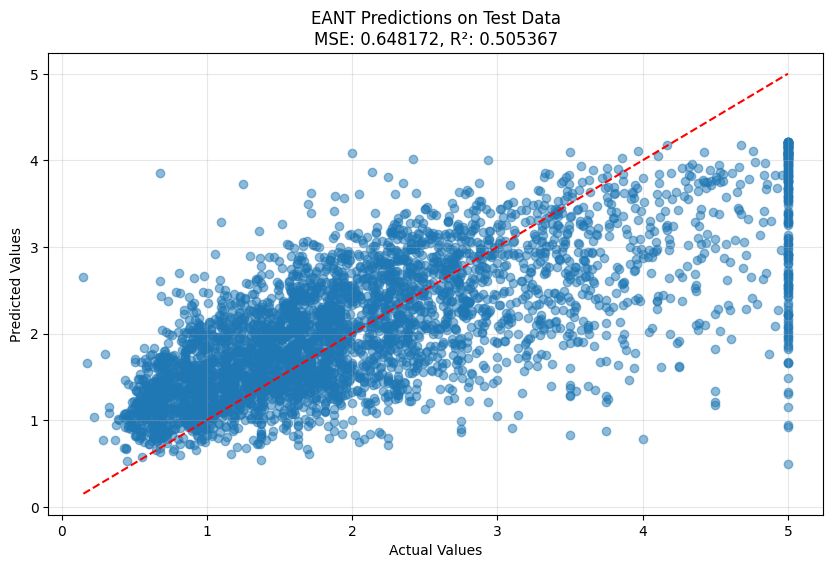


Error Statistics:
Average Absolute Error: 0.605563
Maximum Error: 4.508642
Minimum Error: 0.000176


In [25]:
import numpy as np
X_test_list = X_test.tolist() if isinstance(X_test, np.ndarray) else X_test
y_test_list = y_test.tolist() if isinstance(y_test, np.ndarray) else y_test

# Get the best genome and tree boundaries from the trained model
best_genome = eant.best_genome
best_tree_boundaries = eant.best_tree_boundaries

print("Testing the best genome on test data...")
print(f"Best genome: {best_genome}")

# Create an evaluator with the best genome
from neural_network_evaluator import NeuralNetworkEvaluator
evaluator = NeuralNetworkEvaluator(best_genome, best_tree_boundaries)

# Make predictions on test data
test_predictions = []
for x in X_test_list:
    # Create input dictionary for each test example
    inputs = {}
    for i, val in enumerate(x):
        inputs[f"i{i}"] = val
    
    # Evaluate the network
    outputs = evaluator.evaluate(inputs)
    test_predictions.append(outputs[0])
    
    # Reset state for next example
    evaluator.reset_state()

# Calculate error metrics
from sklearn.metrics import mean_squared_error, r2_score
test_mse = mean_squared_error(y_test_list, test_predictions)
test_r2 = r2_score(y_test_list, test_predictions)

print(f"Test Results:")
print(f"Mean Squared Error (MSE): {test_mse:.6f}")
print(f"R-squared (R²): {test_r2:.6f}")

# Look at some sample predictions
print("\nSample Predictions vs Actual Values:")
for i in range(min(5, len(test_predictions))):
    print(f"Example {i+1}: Actual = {y_test_list[i]:.4f}, Predicted = {test_predictions[i]:.4f}, Error = {abs(y_test_list[i] - test_predictions[i]):.4f}")

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test_list, test_predictions, alpha=0.5)
plt.plot([min(y_test_list), max(y_test_list)], [min(y_test_list), max(y_test_list)], 'r--')
plt.title(f'EANT Predictions on Test Data\nMSE: {test_mse:.6f}, R²: {test_r2:.6f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True, alpha=0.3)
plt.savefig('eant_test_results.png')
plt.show()

# Calculate a few more statistics
errors = [abs(a - p) for a, p in zip(y_test_list, test_predictions)]
average_error = sum(errors) / len(errors)
max_error = max(errors)
min_error = min(errors)

print(f"\nError Statistics:")
print(f"Average Absolute Error: {average_error:.6f}")
print(f"Maximum Error: {max_error:.6f}")
print(f"Minimum Error: {min_error:.6f}")

Generated 20 minimal networks

==================== Generation 1/30 ====================
Evaluating population...
Best fitness so far: -4.150072

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 20 genomes

==================== Generation 2/30 ====================
Evaluating population...
Best fitness so far: -3.299254

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 20 genomes

==================== Generation 3/30 ====================
Evaluating population...
Best fitness so far: -2.893288

Structural Exploitation: Parametric mutation
Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different stru

c:\Users\ailur\OneDrive\Desktop\EANT1\activation_util.py:13: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Added best genome through elitism
Found 1 different structural clusters
Population has 1 different structures
Population has 1 different structures
  V1I4JF0JR0: 20 genomes

==================== Generation 10/30 ====================
Evaluating population...
Best fitness so far: -1.219218
Improvement (0.285555) below threshold (0.3). Switching to exploration.

Structural Exploration: Creating new individuals through structural mutation
Added sub-network to vertex 0
New structure discovered! Protected for 3 generations: V2I7JF0JR0
Added sub-network to vertex 0
New structure discovered! Protected for 3 generations: V2I7JF0JR0
Added connection to vertex 0
New structure discovered! Protected for 3 generations: V1I5JF0JR0
Removed connection from vertex 0
New structure discovered! Protected for 3 generations: V1I3JF0JR0
Removed connection from vertex 0
New structure discovered! Protected for 3 generations: V1I3JF0JR0
Added sub-network to vertex 0
New structure discovered! Protected for 3 gene

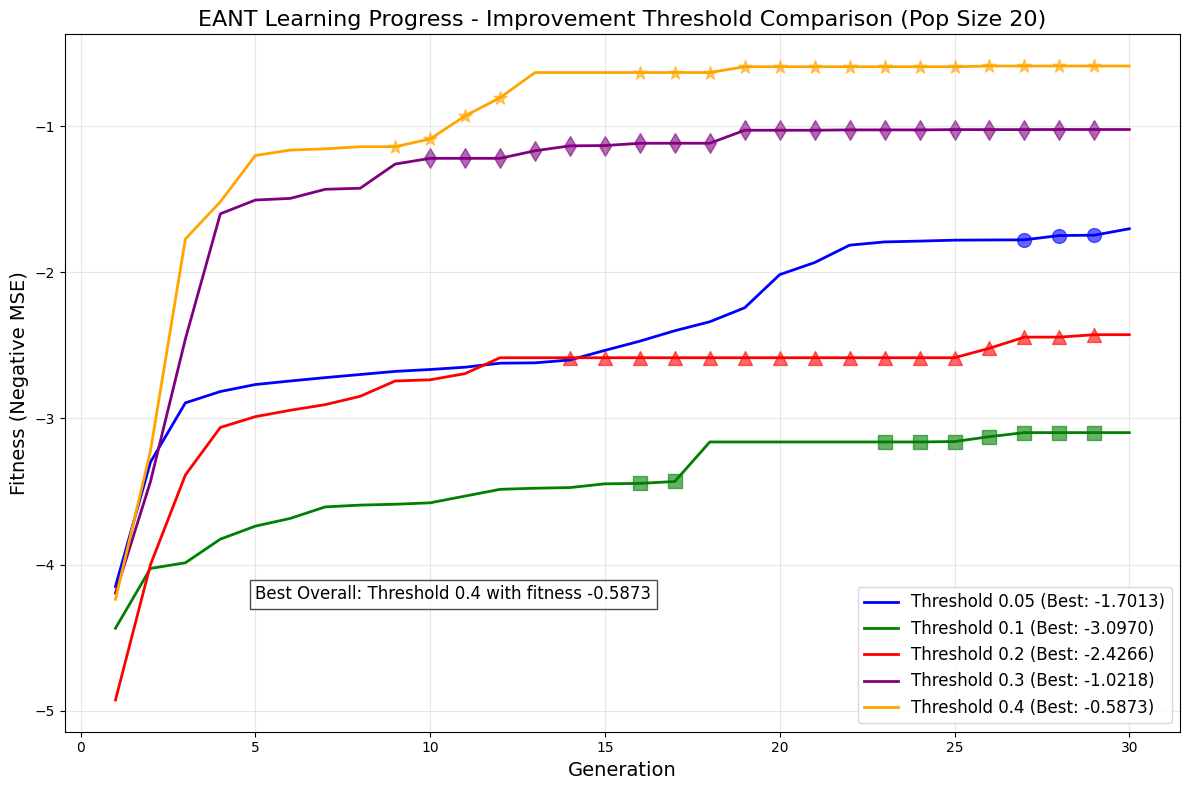

Results Summary (Sorted by Best Fitness):
   improvement_threshold  best_fitness  exploration_phases
4                   0.40     -0.587313                  18
3                   0.30     -1.021831                  20
0                   0.05     -1.701320                   3
2                   0.20     -2.426629                  16
1                   0.10     -3.096986                   9


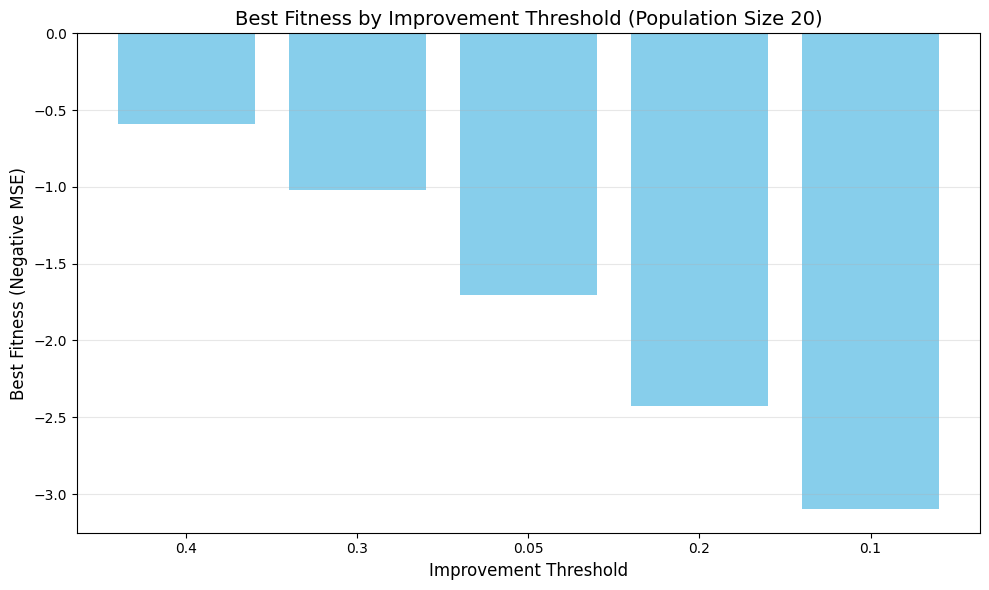

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a single figure
plt.figure(figsize=(12, 8))

# Define colors and markers for different threshold values
colors = ['blue', 'green', 'red', 'purple', 'orange']
markers = ['o', 's', '^', 'd', '*']

# List to store results for comparison
results = []

# Different improvement thresholds to test
threshold_values = [0.05, 0.1, 0.2, 0.3, 0.4]

for i, threshold in enumerate(threshold_values):
    # Create EANT with fixed population size 20
    eant = EANT(population_size=20, input_count=len(X[0]), output_count=1)
    eant.improvement_threshold = threshold  # <-- This is what we're varying
    # Run evolution
    eant.evolve(X, y, 30)
    
    # Get fitness history
    fitness_history = eant.fitness_history
    generations = list(range(1, len(fitness_history) + 1))
    
    # Plot this threshold with a unique color
    plt.plot(generations, fitness_history, color=colors[i], linewidth=2, 
             label=f'Threshold {threshold} (Best: {eant.best_fitness:.4f})')
    
    # Add exploration markers
    if len(fitness_history) > eant.buffer_length:
        exploration_gens = []
        for j in range(eant.buffer_length, len(fitness_history)-1):
            current = fitness_history[j]
            previous = fitness_history[j-eant.buffer_length]
            if current - previous < threshold:
                exploration_gens.append(j+1)  # +1 because generations are 1-indexed
        
        if exploration_gens:
            plt.scatter(exploration_gens, [fitness_history[j-1] for j in exploration_gens], 
                       color=colors[i], marker=markers[i], s=100, alpha=0.6)
    
    # Store result for comparison
    results.append({
        'improvement_threshold': threshold,
        'best_fitness': eant.best_fitness,
        'exploration_phases': len(exploration_gens) if 'exploration_gens' in locals() else 0
    })

# Add labels and title
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Fitness (Negative MSE)', fontsize=14)
plt.title('EANT Learning Progress - Improvement Threshold Comparison (Pop Size 20)', fontsize=16)
plt.grid(True, alpha=0.3)

# Add legend
plt.legend(fontsize=12, loc='lower right')

# Add annotations for best fitness
best_result = max(results, key=lambda x: x['best_fitness'])
plt.text(5, max([min(h) for h in [eant.fitness_history for _ in threshold_values]]), 
         f"Best Overall: Threshold {best_result['improvement_threshold']} with fitness {best_result['best_fitness']:.4f}", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Show plot
plt.tight_layout()
plt.savefig('threshold_comparison.png', dpi=300)
plt.show()

# Print results summary
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('best_fitness', ascending=False)
print("Results Summary (Sorted by Best Fitness):")
print(results_df)

# Create a bar chart to compare results
plt.figure(figsize=(10, 6))
plt.bar(
    [str(t) for t in results_df['improvement_threshold']], 
    results_df['best_fitness'],
    color='skyblue'
)
plt.xlabel('Improvement Threshold', fontsize=12)
plt.ylabel('Best Fitness (Negative MSE)', fontsize=12)
plt.title('Best Fitness by Improvement Threshold (Population Size 20)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('threshold_bar_comparison.png', dpi=300)
plt.show()

In [ ]:
#now